In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [9]:
fname = 'HorseHead.fits'
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [11]:
image_data = hdu_list[0].data

In [12]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [13]:
hdu_list.close()

In [14]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


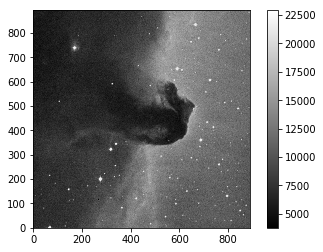

In [28]:
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()

In [17]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


#### Plot a histogram

To make a histogram with matplotlib.pyplot.hist() we'll need to cast the data from a 2D array to something 1 dimensional.
In this case, let's use ndarray.flatten()

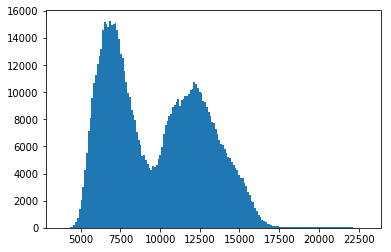

In [18]:
histogram = plt.hist(image_data.flatten(), bins='auto')

# Displaying data with a logarithmic scale

In [19]:
from matplotlib.colors import LogNorm

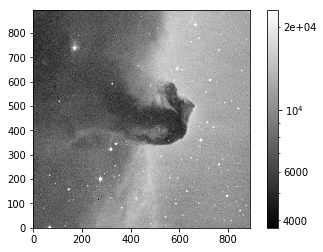

In [31]:
plt.imshow(image_data, cmap = 'gray', norm=LogNorm(), origin='lower')
cbar = plt.colorbar()

#### Stacking Images

Since the noise in an image results from a random process, we use stacking of separate images to improve the signal to noise ratio of objects we observe. here we are going o stack 5 images of M13 taken with a 10inch telescope

In [21]:
#make a list of filenames
image_list = ['M13_blue_0001.fits', 'M13_blue_0002.fits','M13_blue_0003.fits','M13_blue_0004.fits','M13_blue_0005.fits']

In [22]:
#make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

In [23]:
#sum the images together
final_image = np.sum(image_concat, axis=0)

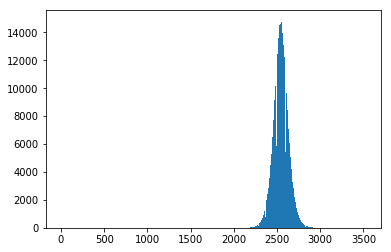

In [24]:
#plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(), bins ='auto')

We'll use the keywords vmin and vmax to set limits o the color scaling for imshow

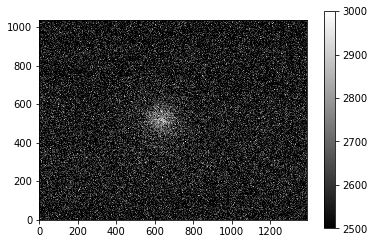

In [33]:
plt.imshow(final_image, cmap='gray', vmin=2.5e3, vmax=3e3, origin='lower')
plt.colorbar()

#### Writing a new FITS file

We use writeto() method.
Will receive an error if the file we are trying to write already exists: use clobber=True

In [34]:
outfile = 'stacked_m13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

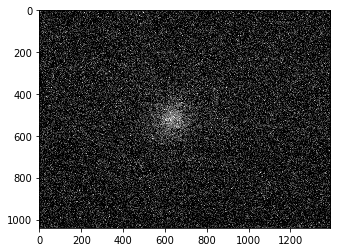

In [35]:
hdu_list = fits.open(outfile)
header = hdu_list[0].header
data = hdu_list[0].data
plt.imshow(data, cmap = 'gray', vmin=2.5e3, vmax=3e3)